In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
zoo = pd.read_csv('zoo.csv')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
X = zoo.drop(columns=['animal_name', 'class_type'])
y = zoo.class_type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
dtree.classes_

array([1, 2, 3, 4, 5, 6, 7])

In [6]:
dtree.feature_importances_

array([0.        , 0.23178637, 0.        , 0.36384843, 0.05073704,
       0.06430868, 0.02046185, 0.        , 0.08518812, 0.        ,
       0.        , 0.15151515, 0.03215434, 0.        , 0.        ,
       0.        ])

In [7]:
y_pred = dtree.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 5])

In [8]:
y_test.values   # only the last prediction is wrong

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3])

In [9]:
dtree.score(X_test, y_test)

0.9523809523809523

In [10]:
dtree.classes_

array([1, 2, 3, 4, 5, 6, 7])

In [11]:
list(map(str, dtree.classes_))

['1', '2', '3', '4', '5', '6', '7']

In [12]:
X_train.shape

(80, 16)

In [13]:
with open("zoo1.dot", 'w') as f:
     f = tree.export_graphviz(dtree,
                              out_file=f,
                              max_depth = 10,
                              impurity = True, 
                              feature_names=X_train.columns, 
                              class_names=list(map(str, dtree.classes_)),
                              rounded = True,
                              filled = True )

In [14]:
from subprocess import check_call
check_call(['dot', '-Tpng', 'zoo1.dot', '-o', 'zoo1.png'])

0

<img src='zoo1.png'>

In [15]:
max_depth_range = list(range(1, 7))
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

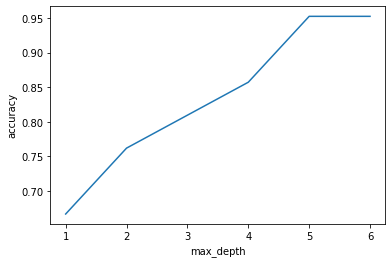

In [16]:
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.plot(max_depth_range, accuracy)

In [17]:
dtreemodel = DecisionTreeClassifier(max_depth=5)
dtreemodel.fit(X_train, y_train)
predictions = dtreemodel.predict(X_test)
print(f"{accuracy_score(y_test, predictions)}")
# max accuracy score already

0.9523809523809523


In [18]:
with open("zoo2.dot", 'w') as f:
     f = tree.export_graphviz(dtreemodel,
                              out_file=f,
                              max_depth = 10,
                              impurity = True, 
                              feature_names=X_train.columns, 
                              class_names=list(map(str, dtree.classes_)),
                              rounded = True,
                              filled = True )

In [19]:
from subprocess import check_call
check_call(['dot', '-Tpng', 'zoo2.dot', '-o', 'zoo2.png'])

0

<img src='zoo2.png'>